# Image Interpretation – Assignment 2

This assignment on Regression covers the labs from 11th and 18th of October. The exercises on this sheet are graded by a maximum of 10(+4) points. You will be asked to implement several functions and write a brief report.

In order to submit the results, send this ipynb file which should contain implemented functions and brief reports with all findings to <mikhail.usvyatsov@geod.baug.ethz.ch> with subject
[Image Interpretation 2018 Assignment 3]
no later than on the
25th of October, 2018.

Your functions should work when called by the provided test code (functions prefixed with `test` ) which must not be modified. When run, they should produce a plausible output, no warnings, and no unnecessary output. Eventual example output is given in the ref_-images. The functions that you write take images as arguments, not image filenames (i.e. do not use imread inside the functions). Your functions should not generate figures/plots themselves, the plots are generated by the test functions.

In addition to the functions, include a brief report explaining the structure of the code and the Python functions used. This includes the reasons for choosing particular functions as well as a short justification of their parameter setting. For the more complicated tasks, the choice of the underlying data structures and algorithms should be explained too. We encourage you to add also diagrams, illustrations, and figures into the report when appropriate, but it is not necessary to copy the related theory from the lecture slides. The code should contain comments if appropriate.

**Team work is not allowed**. Everybody implements his/her own code and writes his/her own report. Discussing issues with others is fine, sharing code and/or report with others is **not**. If you use any code fragments found on the Internet, make sure you reference them properly.

$\def\sc#1{\dosc#1\csod} \def\dosc#1#2\csod{{\rm #1{\small #2}}}$

In this assignment, $Y$ stands for a column vector of “target” values, that is the $i$-th row of Y contains the desired output for the i-th data point. $X$ is a matrix containing the input, where the $i$-th row contains the input values for the $i$-th data point. Often we want to add a constant term in our regression methods. For simplicity, this is done by adding a column of ones to our input data, in $\sc{Python}$ e.g. by doing:

`np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)`

The core of many regression methods is least-squares fitting. If we have a linear model

$$Y = X_{\text{ext}}\theta$$

it is usually over-determined, which means we can not find a $\mathbf{\theta}$ that fulfills this
equation exactly. Instead, we are looking for a $\mathbf{\theta}$ that minimizes the squared error

$$\theta = \arg \min_{\theta^\prime} \|Y - X_\mathsf{ext}\theta^\prime\|^2$$

which is done in $\sc{Python}$ by: `theta = numpy.linalg.lstsq(X_ext, Y)`

(see documentation of $\sc{Python}$ function [numpy.linalg.lstsq](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.lstsq.html)).

If we want to use this $\mathbf{\theta}$ to estimate the values at new input positions, we extend the new input matrix with ones and multiply by $\mathbf{\theta}$:

```
X2_ext = np.concatenate((X2, np.ones((X2.shape[0], 1))), axis=1)
Y2 = np.dot(X2_ext, theta)
```

The function `lineardemo` performs this workflow on some synthetically generated data and shows the values of each variable that is changed, so you can watch what happens during evaluation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

def lineardemo():
    # input values
    X = np.arange(10)
    # target results
    Y = 0.5 + 0.3 * X + np.random.randn(X.shape[0]) * 0.2
    # % show raw values
    plt.figure(figsize=(10, 8))
    plt.scatter(X,Y, label='real points')
    # extend with ones
    X_ex = np.concatenate((X.reshape(-1, 1), np.ones((X.shape[0], 1))), axis=1)
    # determine optimal parameters
    theta = np.linalg.lstsq(X_ex, Y,rcond=-1)[0]

    X2 = np.array((-1, 11))
    
    # for testing, again extend
    X2_ex = np.concatenate((X2.reshape(-1, 1), np.ones((X2.shape[0], 1))), axis=1)
    # determine y values
    Y2 = np.dot(X2_ex, theta)

    plt.plot(X2, Y2, label='fitted line')
    plt.legend(loc='best')

# Problem 1 3P.

In this exercise you are given a timeseries (just some observations) that was artificially generated (see file  _timeseries.csv_). It was obtained combining some known to me and unknown to you polynomial (e.g. $y(t) = t^2 + 2$) plus some random noise. Your task is to find the parameters of the polynomial model that was used.
	
Use `pandas.read_csv('./materials/timeseries.csv')` to load the data. In order to visualize data use `plt.plot(timeseries)`.
	
Polynomial fitting is a traditional application of linear regression. Implement function `ii_fit_poly` that fits a polynomial to the input data. The function should take three arguments: the input data (as a column vector), a column vector of target values, and the desired degree of the polynomial (a non-negative integer). Return your estimated
model (theta).

Also, implement function `ii_apply_poly` that takes two arguments: a model (as returned by your function `ii_fit_poly`) and a column vector of points on which to evaluate the model. Return the estimated values as a column vector.
	
A helper function that extends the feature vector with the polynomial terms (computes $X_\text{ext}$ from $X$ for a given degree) might be useful, as polynomial fits are also going to be used in later exercises. You can use function `test_poly` to test your implementation.
	
You have to research which degree works better (in a range [1, 10]) and report it.

In [2]:
import pandas as pd

In [3]:
def ii_fit_poly(X, y, degree):
    # IMPLEMENT ME: here
    
#     extend the test X
    resultX = ii_poly_extend(X,degree)
    
#     perform lest square modelling
    model = np.linalg.lstsq(resultX, y, rcond=-1)[0]

    return model

In [4]:
def ii_poly_extend(x,degree):
    
    x = x.reshape(x.size,1)
#     add one row of X
    resultX = np.ones(x.shape[0])
    resultX = resultX.reshape(resultX.size,1)
    
#     for every degree, add one row of X^degree
    for i in range(1, degree+1):
        temp = x**i
        resultX = np.column_stack((temp,resultX))

        
    return resultX

In [5]:
def ii_apply_poly(theta, x):
    # IMPLEMENT ME: here
    
#     obtain the degree from theta
    degree = theta.shape[0] - 1
    
#     again extend the predict X
    resultX = ii_poly_extend(x,degree)
    
#     perform estimation
    estimation = np.dot(resultX, theta)
    
    return estimation

In [6]:
def test_poly():
    degrees = np.arange(1,11)

    timeseries = np.array(pd.read_csv('../materials/timeseries.csv', header=None))
    x = timeseries[1, :]
    y = timeseries[0, :]
    
    plt.figure(figsize=(10, 8))

    labels = ['Degree {}'.format(i) for i in degrees]
    plt.scatter(x, y, label='Data')

    for i in range(len(degrees)):
        theta = ii_fit_poly(x, y, degrees[i])
        estimated_y = ii_apply_poly(theta, x)
        residuals = np.linalg.norm(y-estimated_y)
        print('The residuals of degree',degrees[i],":",residuals)
        plt.plot(x, estimated_y, label=labels[i])

    plt.legend(loc='best')
    plt.title('Poly fit')

The residuals of degree 1 : 568.1957733263187
The residuals of degree 2 : 541.6106197852024
The residuals of degree 3 : 296.2150223437595
The residuals of degree 4 : 275.7540519985107
The residuals of degree 5 : 275.6676293902863
The residuals of degree 6 : 275.64556888576436
The residuals of degree 7 : 275.53385728739653
The residuals of degree 8 : 275.3589696907258
The residuals of degree 9 : 275.3487153215362
The residuals of degree 10 : 275.02138576629005


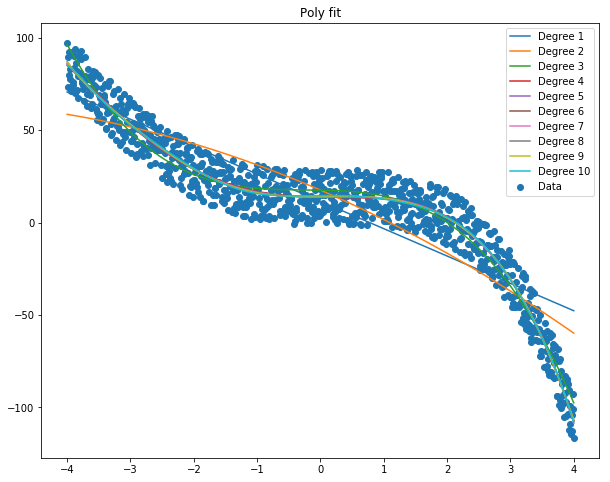

In [7]:
test_poly()

# Brief report
Other than the required function, I have added a line to calculate the residuals from the estimated results from the real Y as an indicator of the models' accuracy. As we can see from the results, the errors get lesser when the degree goes up. However, from degree 4, the extent of the increase is not apparent.

Here I implemented three functions. ii_fit_poly fits the model with np.linalg.lstsq(); ii_poly_extend extends the train and predict x into the desired form for training; and ii_apply_poly predict the results according to the trained model.

# Problem 2. 2P.
Regularization is important for avoiding overfitting on a noisy data input.
* Implement function `ii_fit_poly_ridge` that fits a polynomial to the input data using ridge regression. It should take the same arguments as `ii_fit_poly`, except for an additional argument which is the regularization strength $\lambda$.

You can use ridge regression from here `sklearn.linear_model.ridge_regression`.
	
You can use function `test_poly_ridge` to test your implementation.
	 
* Try to regularize your model for the Exercise 1 problem.
* Experiment how $\lambda$ influences the quality of your model
(to do that you can try to use cross-validation that is not compulsory, but strongly recommended).
	
* Provide the parameters of your best model in the report.

In [8]:
from sklearn.linear_model import ridge_regression
from sklearn import linear_model

In [9]:
def ii_fit_poly_ridge(X, y, degree, lam):
    # IMPLEMENT ME: here
    
#     extend the train X
    resultX = ii_poly_extend(X, degree)
#     perform ridge regression
    model = ridge_regression(resultX, y, lam)      

    
    return model

In [10]:
def test_poly_ridge():
    degree = 9
    lambdas = [0, 1e-7, 1e-3, 1, 100, 1000]
    plt.figure(figsize=(10, 8))

    timeseries = np.array(pd.read_csv('../materials/timeseries.csv', header=None))
    x = timeseries[1, :]
    y = timeseries[0, :]

    labels = ['Lambda {}'.format(i) for i in lambdas]
    plt.scatter(x, y, label='Data')

    for i in range(len(lambdas)):
        theta = ii_fit_poly_ridge(x, y, degree, lambdas[i])
        estimated_y = ii_apply_poly(theta, x)
        plt.plot(x, estimated_y, label=labels[i])

#     added cross validation
    resultX = ii_poly_extend(x, degree)
    clf = linear_model.RidgeCV(alphas=[1e-7, 1e-3, 1, 100, 1000],store_cv_values = True).fit(resultX, y)
    print("The best lambdas obtained by cross validation is: ",clf.alpha_)
    print("The residuals of the different lambdas:", clf.cv_values_.sum(axis=0))
#     
    plt.title('Ridge poly fit')
    plt.legend(loc='best')

The best lambdas obtained by cross validation is:  100.0
The residuals of the different lambdas: [77369.31570744 77369.31036126 77364.12046565 77235.31432363
 77555.05094114]


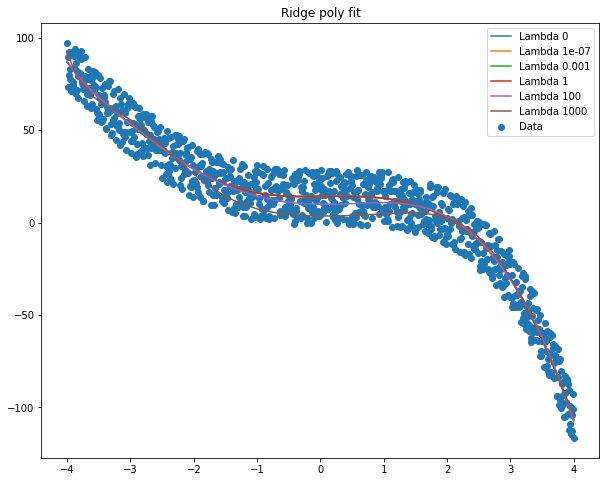

In [11]:
test_poly_ridge()

# Brief report

The structure of the code in this problem set is just like the one in problem 1, except for the lambda parameter required for the ridge regression. 

I also tested the results of using different lambda values with linear_model.RidgeCV function, which implements ridge regression with built-in cross-validation. As we can see from the residuals, the error is both large when lambdas were set rather small and large, and the best lambdas obtained by cross-validation is 100.0. The results indicated that the choice of lambda in ridge regression needs extra attention and is preferably tested with methods like cross-validation.

# Problem 3. 3P.
Here we are going to reconstruct right part of human face from the left part of a human face. We will use linear
regression to model the right part of the human face as a function of the corresponding left part. Implement function `ii_predict_face` that takes two arguments: a training dataset and a query image with no right part of the face.

Training dataset consists of full (left and right part are both there) images of size ($231\times395$). From those images you have to extract labels (right parts) and construct a dataset in the way that will allow you to apply squared error minimization method. The images in the provided dataset are stacked along the third axis (if you imagine what is the shape of the data - the answer would be [number of images, image length, image width]).

You can visualize an image with function `plt.imshow(image)`. The function should return predicted right part with the same shape as the query has (see below).

Using the data from the training dataset, learn a linear regression model with the right part of the image as the output value and the left part of the image as input value. You can use `C1=dataset[:, :198, :)` to extract the left part of the images in the dataset.

In order to get the shape of the data use function `data.shape`.

Your output vector in the linear regression ($Y$ in the intro) should be a $N \times length \times WIDTH/2$ matrix, your input matrix ($X_\text{ext}$) should be $N \times length \times WIDTH/2 + 1$, with ones in the last column and raveled images in the columns left.
    
After you determined the model $\theta$, estimate the right part of the face using your model. You can use `v.reshape([num_examples, rows, cols])` to convert a column vector representation back into the dataset of images.

Estimate the right part of the query by using the previously learned model. Reshape it again to the form of image. You can use script `test_predict_face` to test your implementation.

In [12]:
import os
from sklearn.model_selection import train_test_split

In [13]:
def ii_predict_face(d, q):
    # IMPLEMENT ME: here
    
    trainX, trainY = ii_preprocessing(d)
#     perform least square fitting
    model = np.linalg.lstsq(trainX, trainY, rcond=-1)[0]

    return ii_predict(model, q)

In [14]:
def ii_preprocessing(d):
    
    dm,dn,db = d.shape

#     train

#     devide the right and left face
    trainX = d[:, :, :db // 2]
    if (db % 2) == 0:  
        trainY = d[:, :, db // 2:]
    else:
        trainY = d[:, :, db // 2 + 1:]
        
#     reverse the right face
    trainY = trainY[:,:,::-1]
#     reshape both sets
    trainX = np.reshape(trainX,(trainX.size,1))
    trainY = np.reshape(trainY,trainY.size)
    
#     add a row of 1s to the train X
    ones = np.ones(trainX.size).reshape(trainX.size,1)
    trainX_ext = np.concatenate((trainX, ones), axis = 1)
    
    
    return trainX_ext, trainY

In [15]:
def ii_predict(model, q):
    qm,qn,qb = q.shape
#     reshape the predict data into a row
    q_re = np.reshape(q,(q.size,1))
#     add a row of 1s to the predict data
    ones = np.ones(q_re.size).reshape(q_re.size,1)
    q_ext = np.concatenate((q_re, ones), axis = 1)
#     prediction
    predict_right_face = np.dot(q_ext, model)
#     reshape the prediction into original shape
    result = np.reshape(predict_right_face,(qm,qn,qb))
#     reverse it
    result = result[:,:,::-1]
    
    return result

In [16]:
def test_predict_face():
    dataset = []

    DATA_FOLDER = '../materials/small_dataset/'
    
    for f in os.listdir(DATA_FOLDER):
        if f.endswith('jpg'):
            path = os.path.join(DATA_FOLDER, f)
            dataset.append(plt.imread(path))
        
    dataset = np.asarray(dataset, dtype=np.float32)
    
    d_train, d_val = train_test_split(dataset)
    query = d_val[:, :, :d_val.shape[-1] // 2]
    prediction = ii_predict_face(d_train, query)
    predicted_full = np.concatenate((query, prediction), axis=2)

    i = np.random.choice(len(d_val) - 1)

    fig, ax = plt.subplots(2, 2, figsize=(8, 6))
    
    ax[0, 0].imshow(d_val[i], cmap=plt.cm.gray)
    ax[0, 0].set_title('Original')

    ax[1, 0].imshow(predicted_full[i], cmap=plt.cm.gray)
    ax[1, 0].set_title('Regression result')

    ax[0, 1].imshow(d_val[i + 1], cmap=plt.cm.gray)
    ax[0, 1].set_title('Original')
    
    ax[1, 1].imshow(predicted_full[i + 1], cmap=plt.cm.gray)
    ax[1, 1].set_title('Regression result')

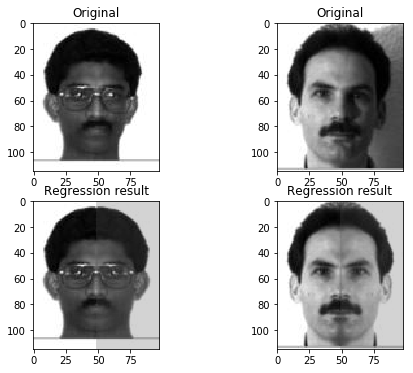

In [17]:
test_predict_face()

# Brief report

Here I implemented three functions. ii_predict_face accepts the train data and predict_X, and returns the predicted results(Predict_Y right face); ii_preprocessing is to preprocess the train data for model fitting; ii_predict predicts the right face according to the trained model.

One thing that needs special attention is the predicted right face is very similar to the original left face. The linear regression model learns limited features and underfits the features, and this is not an ideal model to predict faces.

# Problem 4. 2P.
Regularization is important for avoiding over-fitting on a noisy data input. For the case of images, the model has too much weights and so, regularization might help to improve results significantly.
* Implement function `ii_predict_face_reg` that solves the problem from Exercise 3 using ridge regression.
It should take the same arguments as `ii_function_predict_face`, except for an additional argument which is the regularization strength $\lambda$. 

You can use function `test_predict_face_reg` to test your implementation.
* Research, how the choice of $\lambda$ contributes to the results.
* Report your findings.

In [18]:
def ii_predict_face_reg(d, q, lam):
    # IMPLEMENT ME: here
    
    trainX, trainY = ii_preprocessing(d)
    
#     train the model
    model = ridge_regression(trainX, trainY, lam)


    return ii_predict(model, q)

In [19]:
def test_predict_face_reg():
    dataset = []

    DATA_FOLDER = '../materials/small_dataset/'
    
    for f in os.listdir(DATA_FOLDER):
        if f.endswith('jpg'):
            path = os.path.join(DATA_FOLDER, f)
            dataset.append(plt.imread(path))
        
    dataset = np.asarray(dataset, dtype=np.float32)
    
    d_train, d_val = train_test_split(dataset)
    query = d_val[:, :, :d_val.shape[-1] // 2]
    prediction = ii_predict_face_reg(d_train, query, 1e2)
    predicted_full = np.concatenate((query, prediction), axis=2)

    i = np.random.choice(len(d_val) - 1)

    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    ax[0, 0].imshow(d_val[i], cmap=plt.cm.gray)
    ax[0, 0].set_title('Original')

    ax[1, 0].imshow(predicted_full[i], cmap=plt.cm.gray)
    ax[1, 0].set_title('Regression result')

    ax[0, 1].imshow(d_val[i + 1], cmap=plt.cm.gray)
    ax[0, 1].set_title('Original')
    
    ax[1, 1].imshow(predicted_full[i + 1], cmap=plt.cm.gray)
    ax[1, 1].set_title('Regression result')

The best lambdas obtained by cross validation is:  0.001
The residuals of the different lambdas: [2.73281108e+09 2.73281108e+09 2.73281108e+09 2.73281108e+09
 2.73281108e+09]


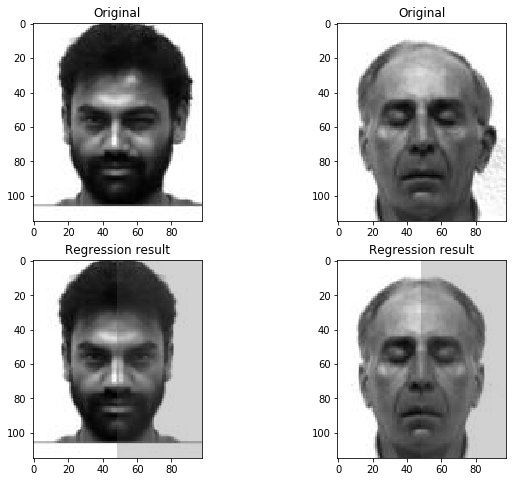

In [20]:
test_predict_face_reg()

# cross validation test for the lambdas
dataset = []
DATA_FOLDER = '../materials/small_dataset/'
for f in os.listdir(DATA_FOLDER):
    if f.endswith('jpg'):
        path = os.path.join(DATA_FOLDER, f)
        dataset.append(plt.imread(path))
        
dataset = np.asarray(dataset, dtype=np.float32)

d_train, d_val = train_test_split(dataset)
query = d_val[:, :, :d_val.shape[-1] // 2]

trainX, trainY = ii_preprocessing(d_train)
clf = linear_model.RidgeCV(alphas=[1e-7, 1e-3, 1, 100, 1000], store_cv_values = True).fit(trainX, trainY)
print("The best lambdas obtained by cross validation is: ",clf.alpha_)
print("The residuals of the different lambdas:", clf.cv_values_.sum(axis=0))
# 


# Brief report

With the help of the functions implemented in Problem 3, the ii_predict_face_reg function can be realized by first preprocess the data and then perform  regression with ridge_regression.

Like Problem 2, I also implemented the cross-validation method for choosing the lambda that could achieve the highest accuracy. However, the residuals of selecting different lamdas were very much like the same and all very large. This result might tell us that when we choose an inappropriate model to accomplish a task, no matter how we select the lambdas will not contribute to the model's performance.

# Problem 5. +4P.
Solve problems from Exercise 3 and 4 for dataset of bigger images. For this problem, create copy of `ii_predict_face_reg` add to its names postfix `_big`.
	
The problem here is the size. Analytical method requires expensive operation (matrix inversion, see (Normal Equation)). After the introduction of regularizer, the total size of the problem becomes too big. Estimate the size of matrices for closed form solution of this problem (report it) and you will see that inversion of this matrix is too expensive (it requires O($n^3$) operations).
	
What could be done: iterative methods (see gradient descent (GD) and stochastic average gradient (SAG)) or use extremely powerful PC :).
	
To test your solution use `test_predict_face_reg_big`.

In [21]:
def ii_predict_face_reg_big(d, q, lam):
    # IMPLEMENT ME: here
    
    trainX, trainY = ii_preprocessing(d)
#     initialize the parameter
    ranNum = np.random.randint(0,trainY.size - 101)
    init_model = ridge_regression(trainX[ranNum:ranNum+100,:], trainY[ranNum:ranNum+100], lam)

# #    gradient descent (GD)
#     alpha = 1e-5
#     final_model, residuals, ite = ii_GD(init_model,trainX_ext, trainY, alpha, lam)

# #    stochastic average gradient (SAG)
#     print(init_model)
#     alpha = 1e-5
#     final_model, residuals, ite = ii_SAG(init_model,trainX_ext, trainY, alpha, lam)
#     print(final_model,ite)

#     conjugate gradient descent (CGD)
    final_model, residuals, ite = ii_CGD(init_model,trainX, trainY, lam)

    return ii_predict(final_model, q)

In [22]:
#     gradient descent (GD)
#     sensitive to the parameter alpha
def ii_GD(ini_model,train_X, train_Y, alpha, lamda , max_iter = 10):
    
#     initialize the parameters
    residuals = []
    pre_model = ini_model
#     alpha is further decreased
    alpha = alpha / train_Y.size
    minstep = 1e-5
    ite = 1
    
    for i in range(max_iter):
#         calculate the descent
        result_1 = np.dot((train_X.dot(pre_model) - train_Y).T,train_X) + pre_model * lamda
        cur_model = pre_model -  2 * alpha * result_1
#         store the residuals
        residuals.append(np.linalg.norm(train_X.dot(pre_model) - train_Y))
#         if the steps are too small in every dimention, exit the loop 
        if(max(np.abs(cur_model-pre_model)) < minstep):
            break;
        pre_model = cur_model
        ite += 1

    return cur_model, residuals, ite

In [23]:
import random

#     stochastic average gradient (SAG)
#     peformance better than gradient descent
#     but still sensitive to the parameter alpha
def ii_SAG(ini_model,train_X, train_Y, alpha, lamda , max_iter = 1000):
    
#     initialize the parameters
    residuals = []
    pre_model = ini_model
    minstep = 1e-5
    ite = 1

    for i in range(max_iter):
#         generate a random matrix containing the considered samples, which lengh is also random
        sample_num = random.randint(1,train_Y.size//1000)
        ranInd = np.random.randint(0,train_Y.size - 1, sample_num)
        #     alpha is further decreased
        alpha_new = alpha / 10 / sample_num
#         get the sample X and Y
        sample_X = train_X[ranInd,:]
        sample_Y = train_Y[ranInd]
#         calculate the descent for the sample X and Y
        result_1 = np.dot((sample_X.dot(pre_model) - sample_Y).T,sample_X) + pre_model * lamda
        cur_model = pre_model -  2 * alpha_new * result_1
#         store the residuals
        residuals.append(np.linalg.norm(sample_X.dot(pre_model) - sample_Y))
#         if the steps are too small in every dimention, exit the loop 
        if(max(np.abs(cur_model-pre_model)) < minstep):
            print(ite)
            break;
        pre_model = cur_model
        ite += 1

    return cur_model, residuals, ite

In [24]:
from scipy import sparse

#   conjugate gradient descent (CGD)
#   solve the function AX = b, where A=X'X, X=model, b=X
def ii_CGD(ini_model,train_X, train_Y, lamda , max_iter = 100):
#     store the X and Y into sparse matrix
    sX = sparse.bsr_matrix(train_X)
    sY = sparse.bsr_matrix(train_Y)
#     the lamda matrix
    lamda_Mat = np.identity(ini_model.shape[0])*lamda
    
#     initialize the parameters
    r = train_X.transpose().dot(train_Y) - lamda_Mat.dot(ini_model) - sX.transpose().dot((sX.dot(ini_model)))
    p = r
    r2 = sum(r * r)
    ite = 0
    minstep = 1e-6
    residuals = []
    cur_model = ini_model
    
    for i in range(max_iter):
        APk = sX.transpose().dot((sX.dot(p)))
        tempA = p.transpose().dot(lamda_Mat.dot(p)) + p.transpose().dot(APk)
        
        alpha = r2 / tempA
        cur_model = cur_model + alpha * p
        r = r - alpha * APk
        r2_new = sum(r*r)
#         store the residuals
        residuals.append(r)
#         if the residuals of this step is efficiently small, exit the loop
        if( max(np.abs(r)) < minstep):
            break;
        beta = r2_new / r2
        p = r + beta * p
        r2 = r2_new
        ite += 1
    return cur_model, residuals, ite

In [25]:
def test_predict_face_reg_big():
    dataset = []

    DATA_FOLDER = '../materials/dataset/'
    
    for f in os.listdir(DATA_FOLDER):
        if f.endswith('pgm'):
            path = os.path.join(DATA_FOLDER, f)
            dataset.append(plt.imread(path))
        
    dataset = np.asarray(dataset, dtype=np.float32)
    
    d_train, d_val = train_test_split(dataset)
    query = d_val[:, :, :d_val.shape[-1] // 2]
    prediction = ii_predict_face_reg_big(d_train, query, 1e2)
    predicted_full = np.concatenate((query, prediction), axis=2)

    i = np.random.choice(len(d_val) - 1)

    fig, ax = plt.subplots(2, 2, figsize=(10, 8))
    
    ax[0, 0].imshow(d_val[i], cmap=plt.cm.gray)
    ax[0, 0].set_title('Original')

    ax[1, 0].imshow(predicted_full[i], cmap=plt.cm.gray)
    ax[1, 0].set_title('Regression result')

    ax[0, 1].imshow(d_val[i + 1], cmap=plt.cm.gray)
    ax[0, 1].set_title('Original')
    
    ax[1, 1].imshow(predicted_full[i + 1], cmap=plt.cm.gray)
    ax[1, 1].set_title('Regression result')

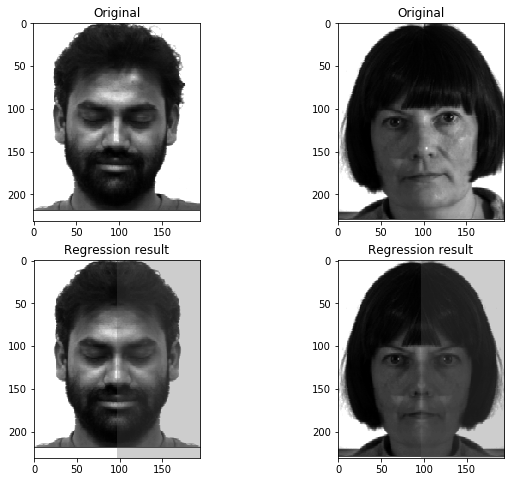

In [26]:
test_predict_face_reg_big()

# Brief report

In this task, I implemented three iterative methods: ii_GD (gradient descent), ii_SAG (stochastic average gradient) and ii_CGD (conjugate gradient descent). 

The first two method is strongly sensitive to the learning rate alpha: If the learning rate alpha is selected too small, the number of iterations will increase, and the convergence speed will be slower. If the learning rate alpha is too large, the optimal solution may be skipped, and eventually, it will not converge. Normalizing the feature data might help to increase calculation speed. But as the training data X has the dimension of (2,756,061, 2), and XX' has the size of (2,756,061, 2,756,061), the converging speed is still quite slow, and I cannot obtain a final result with my computer.

The conjugate gradient descent requires no extra input parameter and is very efficient in this task. 

As mentioned before, the dimention of $XX'$ is (2,756,061, 2,756,061), and reversing it  requires O($n^3$) operations, which made it hard to compute. Actually, storing the matrix $XX'$ is already a problem, as it requires 2,756,061 * 2,756,061 * 64= 486,135,823,086,144 bits to store. I used scipy sparse matrix and calculate $X(X'\theta)$ instead of $XX'\theta$ to maintain the sparse characteristics in the matrix